In [11]:
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import glob
import math
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import PIL

In [6]:
dataframe= pd.read_csv('/content/drive/My Drive/Sorghom/train_cultivar_mapping.csv')
dataframe.dropna(inplace=True)
dataframe['cultivar']=dataframe['cultivar'].astype(str)


<Axes: >

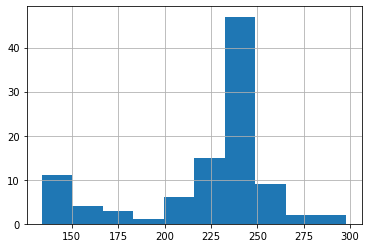

In [19]:
dataframe.cultivar.value_counts().hist()

In [7]:
labels=list(np.unique(dataframe['cultivar']))

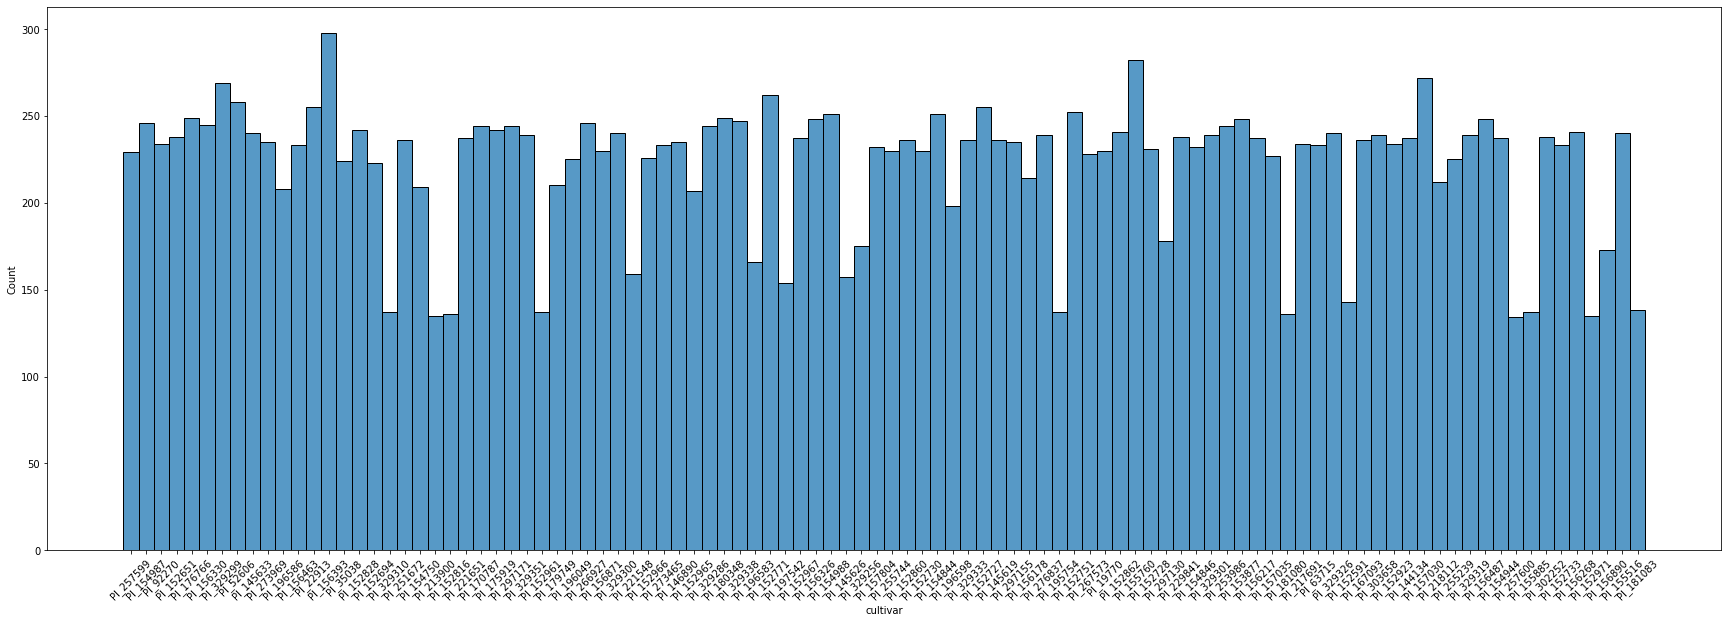

In [8]:
import seaborn as sns
a=pd.DataFrame({'cultivar':dataframe['cultivar']})
plt.figure(figsize=(30,10))
sns.histplot(a,x='cultivar')
plt.xticks(rotation=45)
plt.show()

Skew:  image   -1.255163
dtype: float64


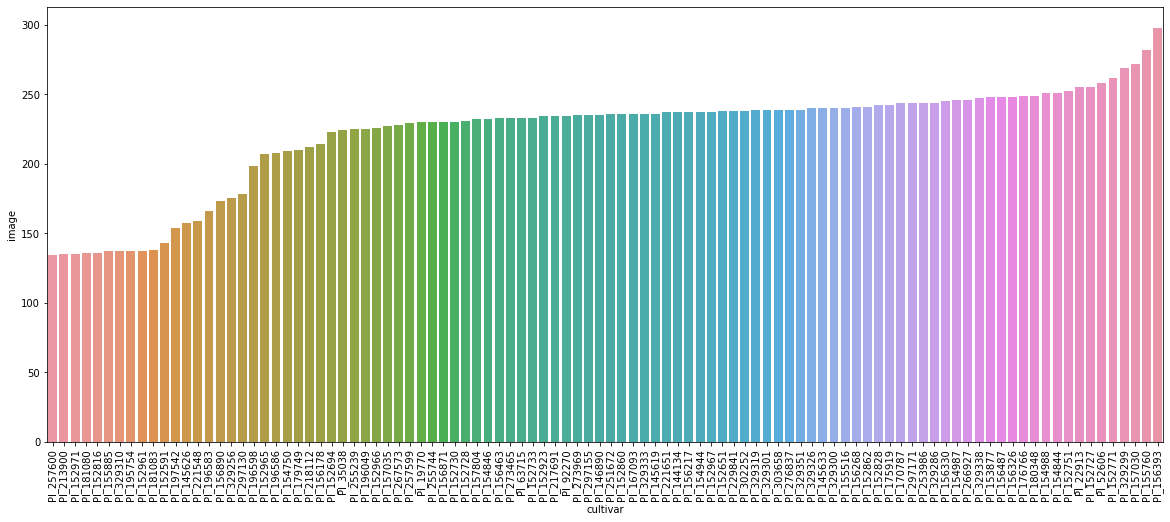

In [9]:


number_of_images = dataframe.groupby('cultivar').count().sort_values('image')
print('Skew: ', number_of_images.skew())

plt.figure(figsize=(20, 8))
plt.xticks(rotation=90)
sns.barplot(x=number_of_images.index, y=number_of_images['image'])
plt.show()



In [15]:
def get_pil_image(dirname, path):
    return PIL.Image.open(os.path.join(f'../input/{dirname}', path))

def get_image(dirname, path):
    return np.array(get_pil_image(dirname, path))

def image_histplot(img, **kwargs):
    if not 'figsize' in kwargs: kwargs['figsize'] = (12, 3)
    fig, axes = plt.subplots(1, 4, **kwargs)
    plt.tight_layout()
    axes[0].imshow(img)
    for i in range(3):
        axes[1+i].set_yticks([])
        sns.histplot(img[:,:,i].flatten() / 255, ax=axes[1+i], color="rgb"[i], alpha=0.33)
    plt.show()

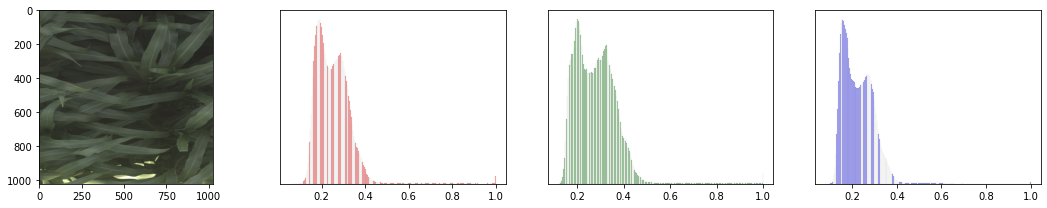

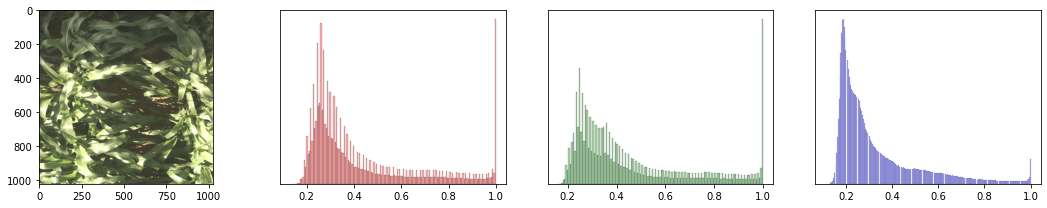

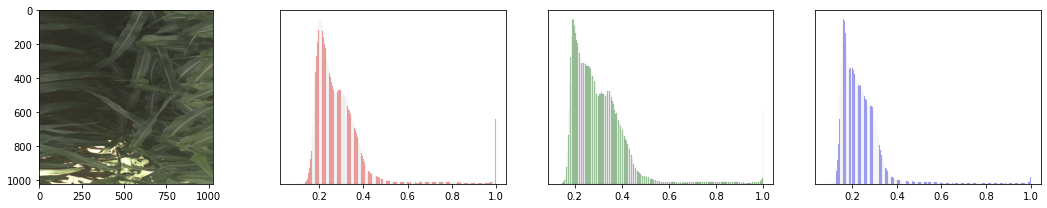

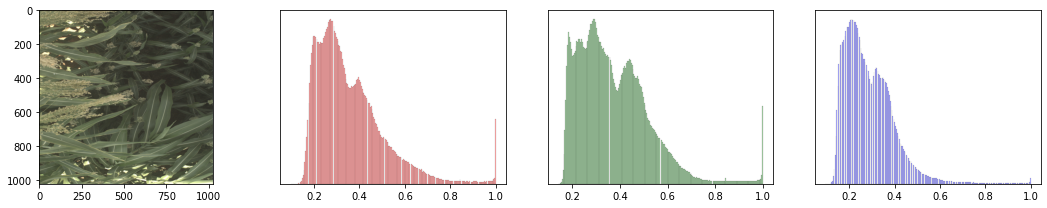

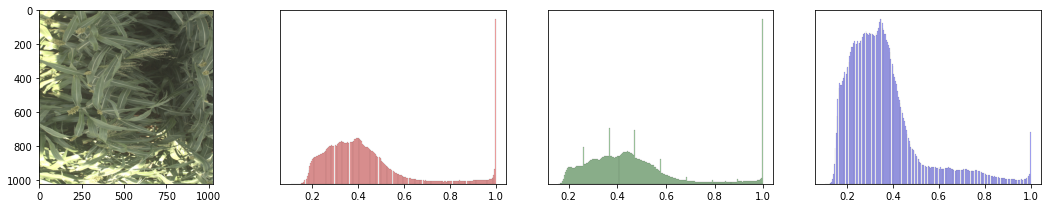

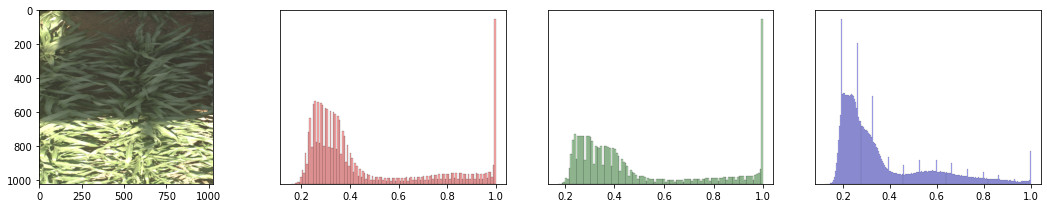

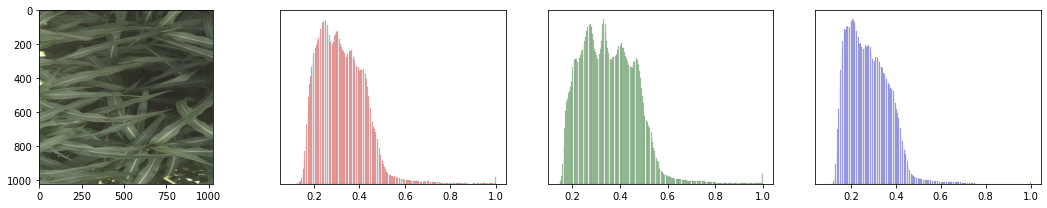

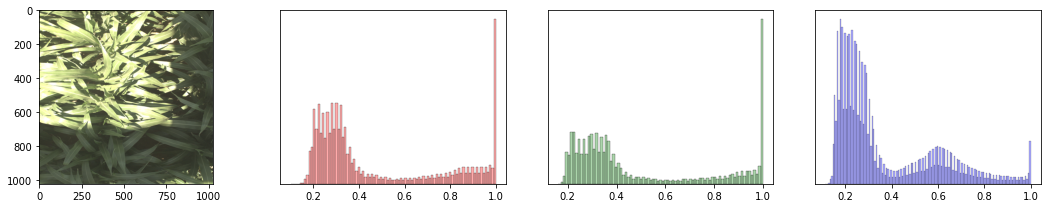

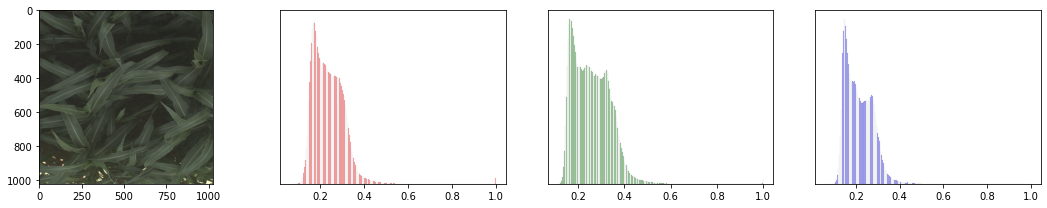

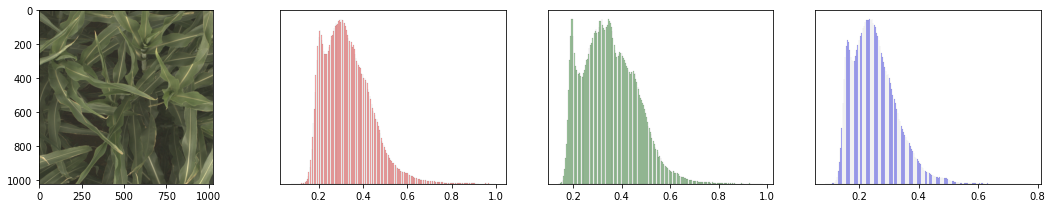

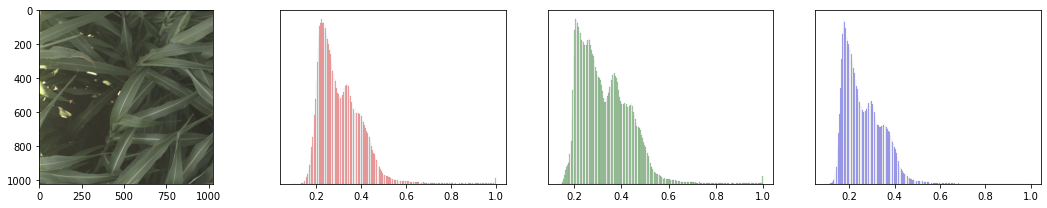

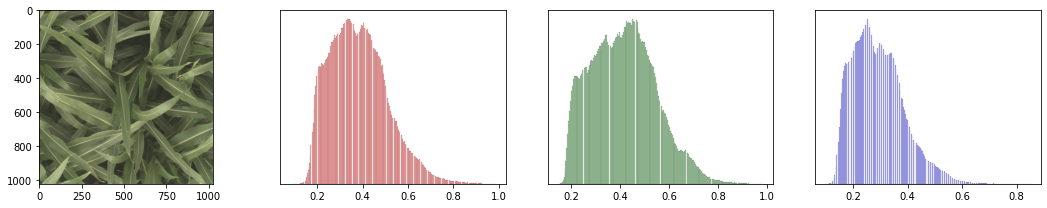

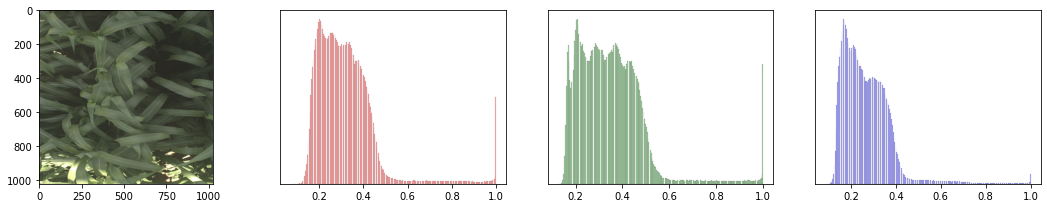

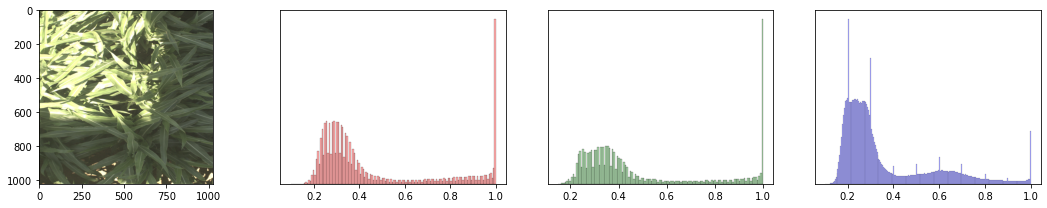

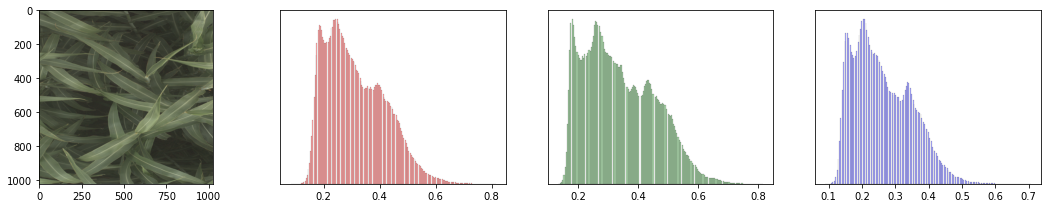

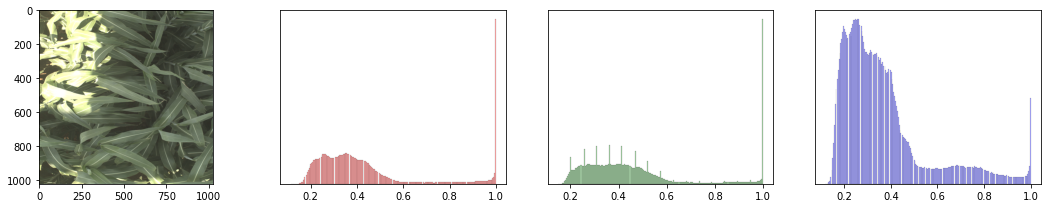

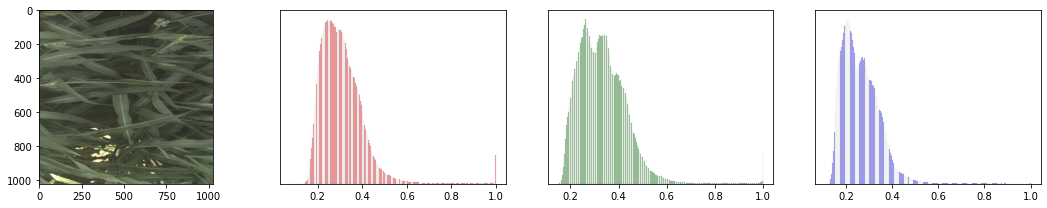

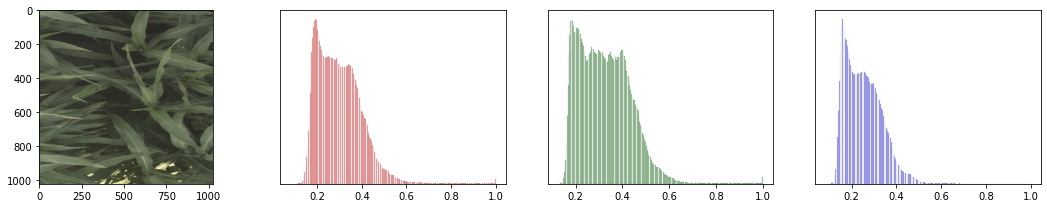

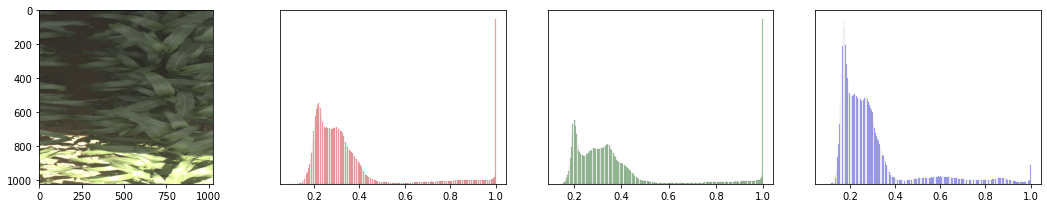

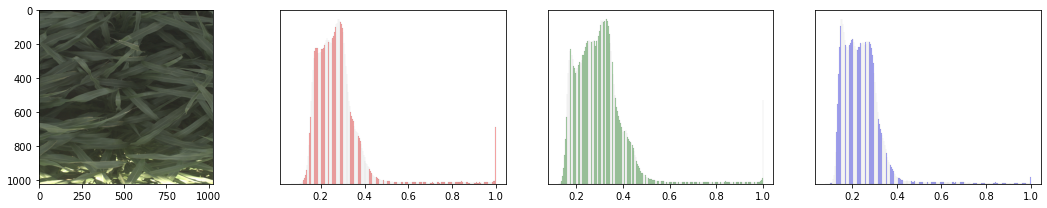

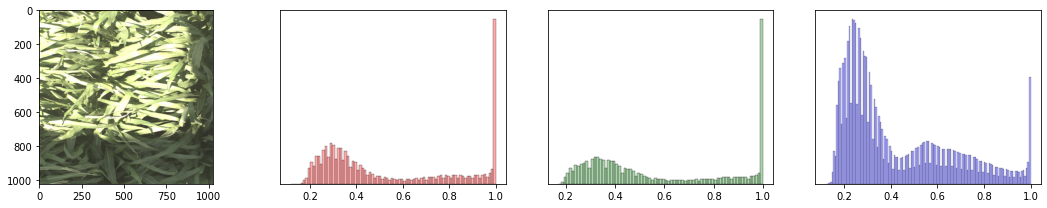

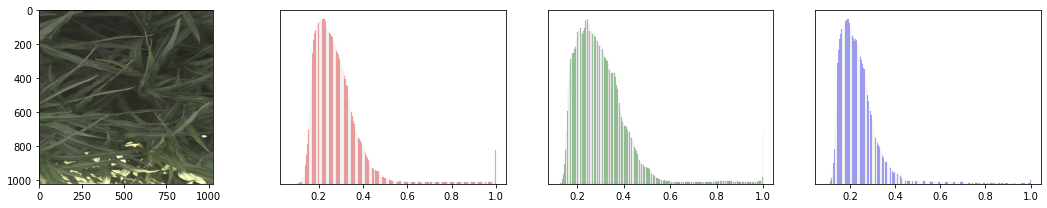

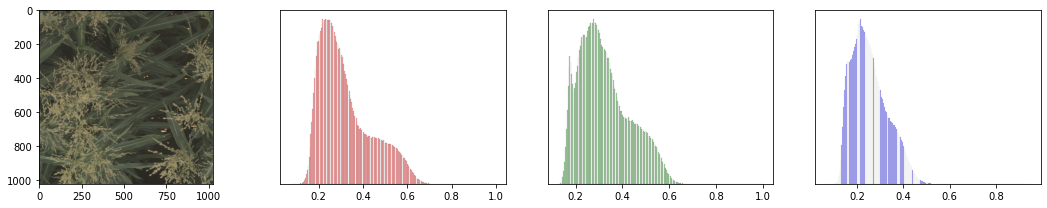

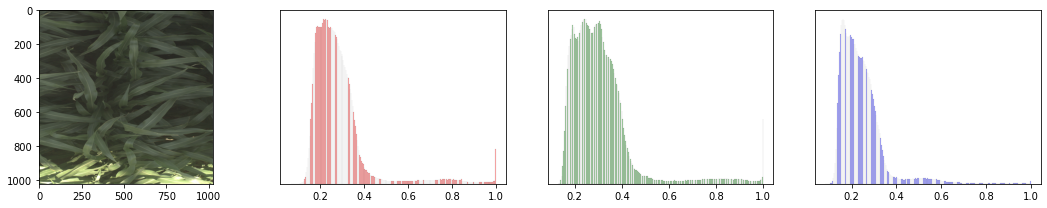

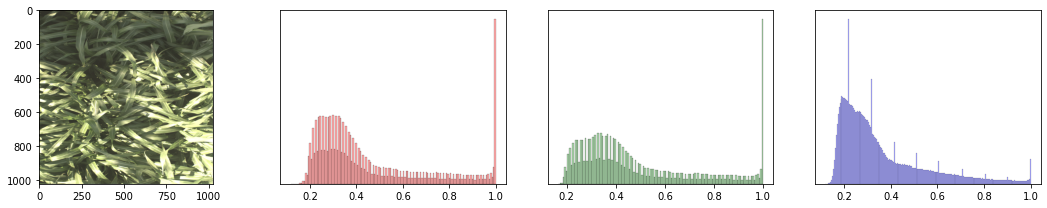

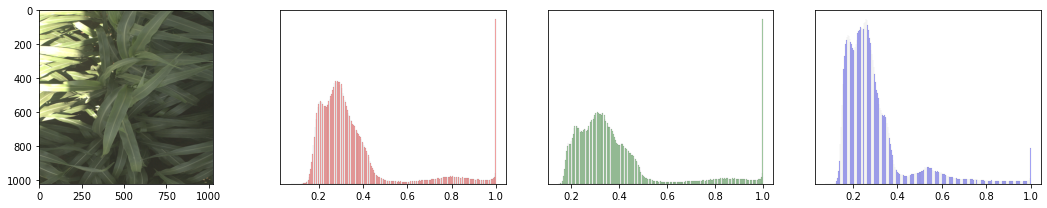

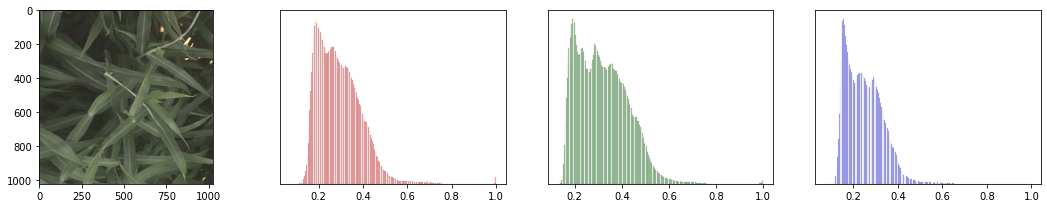

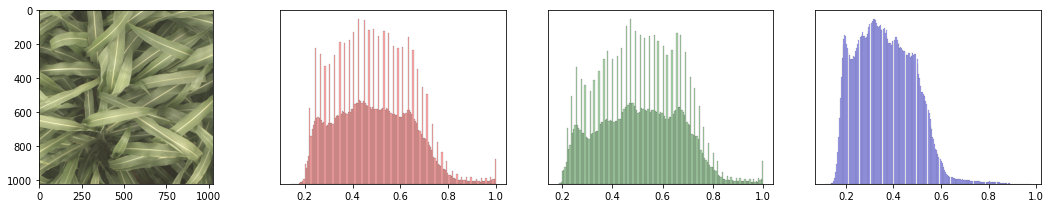

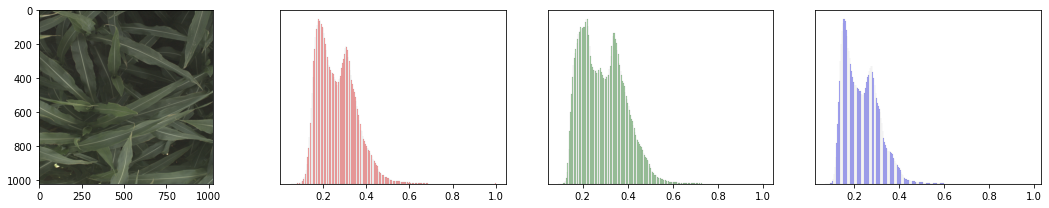

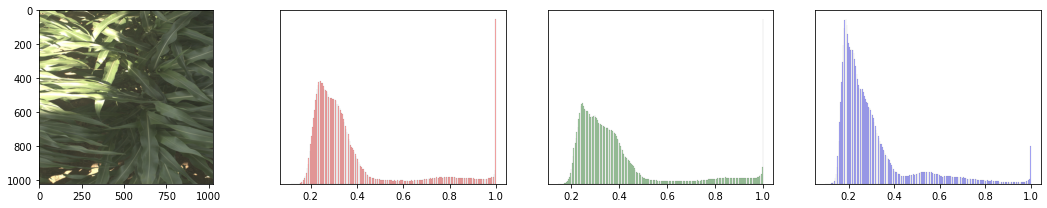

In [18]:
for i in range(30):
    image_name, cultivar = dataframe.loc[i]
    x = np.array(PIL.Image.open('/content/drive/My Drive/Sorghom/train_images/' + image_name)  )
    image_histplot(x , figsize=(15, 3))